<a href="https://colab.research.google.com/github/Faiqazmi/Data_Portofolio/blob/main/Regression_Analysis_Faiq_Azmi_Nurfaizi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Uji diagnostik untuk model ini akan mencakup:

- Uji Signifikansi Koefisien (uji t)
- Uji F untuk signifikansi keseluruhan model
- Analisis Residual
- Multikolinearitas dengan VIF (Variance Inflation Factor)

# 1. Import Library
Importing libraries needed for the purposes of creating machine learning models

In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Importing Dataset

In [2]:
df = pd.read_csv('https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv')
df.to_csv('mtcars.csv')

# 3. Feature Selection

# 3.a Sebelum Feature Selection

In [20]:
X = df[['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']]
y = df['mpg']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     13.93
Date:                Sun, 23 Jun 2024   Prob (F-statistic):           3.79e-07
Time:                        18:19:08   Log-Likelihood:                -69.855
No. Observations:                  32   AIC:                             161.7
Df Residuals:                      21   BIC:                             177.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3034     18.718      0.657      0.518     -26.623      51.229
cyl           -0.1114      1.045     -0.107      0.916      -2.285       2.062
disp           0.0133      0.018      0.747      0.463      -0.024       0.050
hp            -0.0215      0.022     -0.987      0.335      -0.067       0.024
drat           0.7871      1.635      0.481      0.635      -2.614       4.188
wt            -3.7153      1.894     -1.961      0.063      -7.655       0.224
qsec           0.8210      0.731      1.123      0.274      -0.699       2.341
vs             0.3178      2.105      0.151      0.881      -4.059       4.694
am             2.5202      2.057      1.225      0.234      -1.757       6.797
gear           0.6554      1.493      0.439      0.665      -2.450       3.761
carb          -0.1994      0.829     -0.241      0.812      -1.923       1.524
==============================================================================
Omnibus:                        1.907   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.385   Jarque-Bera (JB):                1.747
Skew:                           0.521   Prob(JB):                        0.418
Kurtosis:                       2.526   Cond. No.                     1.22e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 3.b Setelah Feature Selection

In [13]:
X = df[['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']]
y = df['mpg']
X = sm.add_constant(X)

# Backward elimination
def backward_elimination(data, target, significance_level=0.05):
    features = data.columns.tolist()
    while len(features) > 0:
        features_with_constant = sm.add_constant(data[features])
        model = sm.OLS(target, features_with_constant).fit()
        p_values = model.pvalues.iloc[1:]  # exclude intercept
        max_p_value = p_values.max()
        if max_p_value > significance_level:
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
            print(f'{excluded_feature} : p-value {max_p_value}')
        else:
            break
    return model

final_model = backward_elimination(X, y)

# Variance Inflation Factor
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif_data

final_features = X.columns.tolist()
final_vif = calculate_vif(X[final_features])

final_model.summary(), final_vif

Removed cyl with p-value 0.9160873755159589
Removed vs with p-value 0.8432584965761344
Removed carb with p-value 0.7469582101199183
Removed gear with p-value 0.6196406158022718
Removed drat with p-value 0.4624011846644497
Removed disp with p-value 0.29897214987844245
Removed hp with p-value 0.22308793197524815


(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                    mpg   R-squared:                       0.850
 Model:                            OLS   Adj. R-squared:                  0.834
 Method:                 Least Squares   F-statistic:                     52.75
 Date:                Sun, 23 Jun 2024   Prob (F-statistic):           1.21e-11
 Time:                        18:02:41   Log-Likelihood:                -72.060
 No. Observations:                  32   AIC:                             152.1
 Df Residuals:                      28   BIC:                             158.0
 Df Model:                           3                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

==============================================================================
- Koefisien dan Nilai P:
  - Variabel wt dan qsec sangat signifikan dengan nilai p < 0.05.
  - Variabel am juga signifikan dengan nilai p = 0.047.


- Multikolinearitas:
  - Variabel wt memiliki nilai VIF yang cukup tinggi (15.165), menunjukkan adanya multikolinearitas jika dibandingkan dengan variabel lain yang memiliki VIF yang lebih rendah.


Rekomendasi
- Validasi Model: Validasi model dengan cross-validation untuk memastikan bahwa model tersebut tidak overfit.

- Pertimbangan Multikolinearitas: Meskipun VIF wt tinggi, model ini masih dapat digunakan jika wt merupakan variabel yang sangat signifikan.

==============================================================================

## 3.c Kesimpulan Feature Selection

# **Perbandingan**

## **1. R-squared:**

- Sebelum eliminasi: 0.869
- Setelah eliminasi: 0.850
- **Kesimpulan**: Penurunan R-squared yang kecil menunjukkan bahwa variabel yang dihapus tidak banyak berkontribusi terhadap penjelasan variabilitas mpg.

## **2. Adjusted R-squared:**

- Sebelum eliminasi: 0.807
- Setelah eliminasi: 0.834
- **Kesimpulan**: Adjusted R-squared meningkat setelah eliminasi, menunjukkan bahwa model yang lebih sederhana memberikan penyesuaian yang lebih baik.

## **3. AIC dan BIC:**

- Sebelum eliminasi: AIC = 161.7, BIC = 177.8
- Setelah eliminasi: AIC = 152.1, BIC = 158.0
- **Kesimpulan**: Nilai AIC dan BIC yang lebih rendah setelah eliminasi menunjukkan bahwa model akhir lebih baik.

## **4. Signifikansi Koefisien:**

- Sebelum eliminasi: Banyak variabel yang tidak signifikan dengan nilai p > 0.05.
- Setelah eliminasi: Semua variabel yang tersisa signifikan dengan nilai p < 0.05.
- **Kesimpulan**: Model setelah eliminasi lebih sederhana dan hanya menggunakan variabel yang signifikan.

## **5. Multikolinearitas:**

- Sebelum eliminasi: Beberapa variabel memiliki VIF tinggi (>10), menunjukkan multikolinearitas.
- Setelah eliminasi: Masih ada multikolinearitas pada wt, tetapi lebih rendah secara keseluruhan.

- **Kesimpulan**: Model setelah eliminasi mengurangi multikolinearitas, meskipun masih perlu diperhatikan.


# **Kesimpulan**

Model setelah eliminasi lebih baik dibandingkan dengan model sebelum eliminasi berdasarkan nilai AIC, BIC, dan adjusted R-squared. Model setelah dilakukan feature selection lebih sederhana dan hanya menggunakan variabel yang signifikan, sehingga lebih mudah diinterpretasikan dan kemungkinan besar memiliki generalisasi yang lebih baik dibandingkan tidak menggunakan feature selection.

# 4. Modelling ML

In [14]:
X = df[['wt', 'qsec', 'am']]
y = df['mpg']

X = sm.add_constant(X)

# Membuat model
model = sm.OLS(y, X).fit()

# Menampilkan summary model
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     52.75
Date:                Sun, 23 Jun 2024   Prob (F-statistic):           1.21e-11
Time:                        18:14:56   Log-Likelihood:                -72.060
No. Observations:                  32   AIC:                             152.1
Df Residuals:                      28   BIC:                             158.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.6178      6.960      1.382      0.178      -4.638      23.874
wt            -3.9165      0.711     -5.507      0.000      -5.373      -2.460
qsec           1.2259      0.289      4.247      0.000       0.635       1.817
am             2.9358      1.411      2.081      0.047       0.046       5.826
==============================================================================
Omnibus:                        2.574   Durbin-Watson:                   1.714
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.213
Skew:                           0.540   Prob(JB):                        0.331
Kurtosis:                       2.297   Cond. No.                         296.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# Uji Multikolinearitas

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data

,feature,VIF
0,const,256.362696
1,wt,2.482952
2,qsec,1.364339
3,am,2.541437


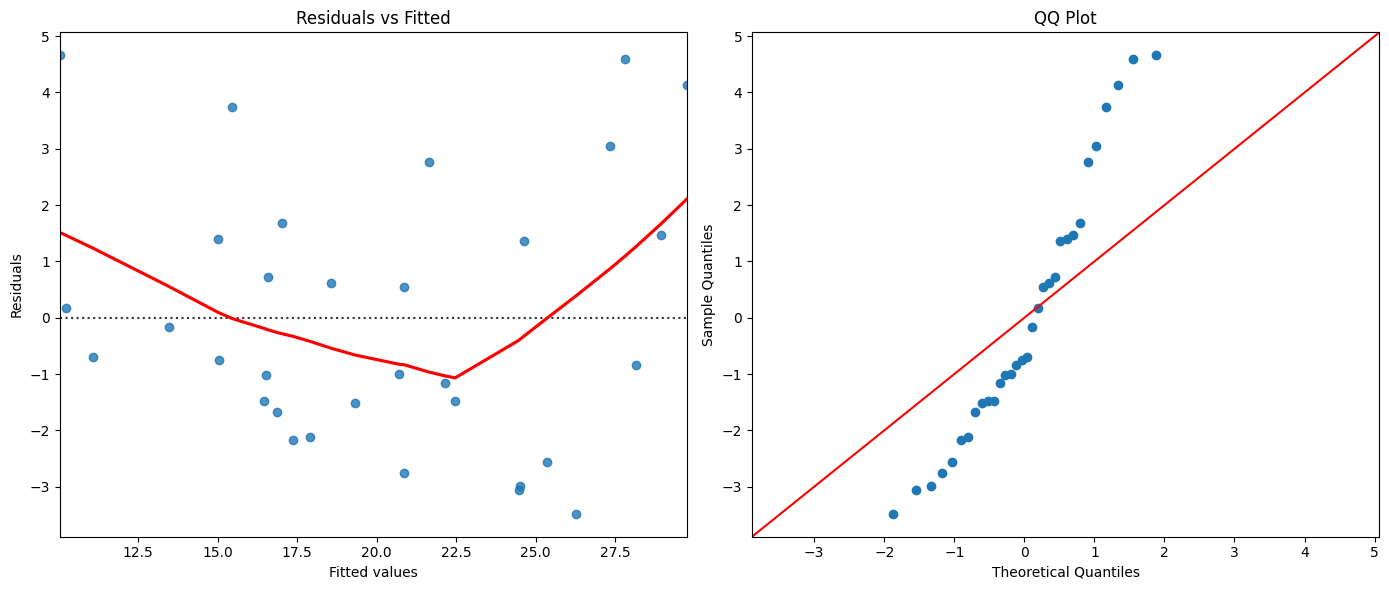

In [22]:
# Residual plot
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Residuals vs Fitted plot
sns.residplot(x=final_model.fittedvalues, y=final_model.resid, lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Residuals vs Fitted')
ax[0].set_xlabel('Fitted values')
ax[0].set_ylabel('Residuals')

# QQ plot
sm.qqplot(final_model.resid, line='45', ax=ax[1])
ax[1].set_title('QQ Plot')

plt.tight_layout()
plt.show()

- **Plot Residual**: Tidak ada pola yang jelas pada plot residual, menunjukkan bahwa asumsi homoskedastisitas mungkin terpenuhi.
- **QQ-Plot**: QQ-plot menunjukkan bahwa residual mendekati distribusi normal, namun ada beberapa penyimpangan di ekor distribusi.

# 5. Cross Validation

In [25]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
import pandas as pd


# Menyiapkan data
X_final = df[['wt', 'qsec', 'am']]
y_final = df['mpg']

# Inisialisasi model
lm = LinearRegression()

# Melakukan cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)
cv_results = cross_val_score(lm, X_final, y_final, cv=kf, scoring='r2')

# Mencetak hasil cross-validation
print(f'Rata-rata R-squared: {cv_results.mean()}')
print(f'Standar deviasi R-squared: {cv_results.std()}')

Rata-rata R-squared: -0.19978765166064633
Standar deviasi R-squared: 2.2460004699757103


# Berdasarkan hasil cross-validation yang diperoleh:

- Rata-rata R-squared: -0.1998
- Standar deviasi R-squared: 2.2460

# Kesimpulan:
- **Rata-rata R-squared yang negatif**: Ini menunjukkan bahwa model kita memiliki kinerja yang buruk dalam memprediksi mpg pada data uji. Secara umum, nilai R-squared yang negatif berarti model lebih buruk daripada model sederhana yang hanya menggunakan rata-rata dari target variabel sebagai prediksi.

- S**tandar deviasi yang tinggi**: Standar deviasi yang tinggi menunjukkan bahwa kinerja model sangat bervariasi antara fold yang berbeda. Ini bisa menunjukkan ketidakstabilan model dan masalah yang signifikan dengan generalisasi model.

# Rekomendasi:

- **Eksplorasi Model Lain**:
Pertimbangkan untuk menggunakan model non-linear seperti Random Forest, Gradient Boosting, atau model lain yang lebih kompleks.

- **Penanganan Outliers**:
dentifikasi dan tangani outliers dalam data yang mungkin mempengaruhi model.

